<a href="https://colab.research.google.com/github/SIVASKANDAN-P/sentiment-based-product-recommendation-system/blob/main/sentiment_based_product_recommendation_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [92]:
#!pip install ydata_profiling

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import chardet
import seaborn as sns
from ydata_profiling import ProfileReport

In [53]:
def fileopen(path):
  '''
  Detects the encoding of the file and Returns the file in given path.
  '''
  with open(path, "rb") as f:
    encoding = chardet.detect(f.read())["encoding"]
    file = pd.read_csv(filepath_or_buffer=path,encoding = encoding)
  return file

In [54]:
def isnull(df):
    '''
    dataframe is passed and returns the null columns and its count
    '''
    return df.isnull().sum()[df.isnull().sum()>0]

In [84]:
def uniq_dict(df,col):
  '''
  Creating a dict with uniques values in column and corresponding index starting
  from zero to length of unique values.
  '''
  uniq = list(df[col].unique()) # list of unique values in columns
  print("No of unique values : {}".format(len(uniq)))
  ind = range(0,len(df[col].unique())) # mapping value starting from 0 to list of columns
  result = dict(map(lambda x, y: (x,y), uniq, ind)) #creating dictionary mapping between unq and idx
  return result

In [87]:
def mapper(df,col):
  '''
  Mapping the unique value with numeric index starting from 0 to length of unique
  value
  '''
  print(col+" : ")
  dic = uniq_dict(df,col)
  df[col]=df[col].apply(lambda x: dic[x])
  return df

In [55]:
desc = fileopen("/content/drive/MyDrive/sentiment-based product recommendation system/Data+Attribute+Description.csv")

In [88]:
review = fileopen("/content/drive/MyDrive/sentiment-based product recommendation system/sample30.csv")

In [57]:
review.head()

id            brand  \
0  AV13O1A8GV-KLJ3akUyj  Universal Music   
1  AV14LG0R-jtxr-f38QfS         Lundberg   
2  AV14LG0R-jtxr-f38QfS         Lundberg   
3  AV16khLE-jtxr-f38VFn              K-Y   
4  AV16khLE-jtxr-f38VFn              K-Y   

                                          categories  \
0  Movies, Music & Books,Music,R&b,Movies & TV,Mo...   
1  Food,Packaged Foods,Snacks,Crackers,Snacks, Co...   
2  Food,Packaged Foods,Snacks,Crackers,Snacks, Co...   
3  Personal Care,Medicine Cabinet,Lubricant/Sperm...   
4  Personal Care,Medicine Cabinet,Lubricant/Sperm...   

                         manufacturer  \
0  Universal Music Group / Cash Money   
1                            Lundberg   
2                            Lundberg   
3                                 K-Y   
4                                 K-Y   

                                         name              reviews_date  \
0   Pink Friday: Roman Reloaded Re-Up (w/dvd)  2012-11-30T06:21:45.000Z   
1  Lundberg Organic Cinnamon Toast Rice Cakes  2017-07-09T00:00:00.000Z   
2  Lundberg Organic Cinnamon Toast Rice Cakes  2017-07-09T00:00:00.000Z   
3            K-Y Love Sensuality Pleasure Gel  2016-01-06T00:00:00.000Z   
4            K-Y Love Sensuality Pleasure Gel  2016-12-21T00:00:00.000Z   

  reviews_didPurchase reviews_doRecommend  reviews_rating  \
0                 NaN                 NaN               5   
1                True                 NaN               5   
2                True                 NaN               5   
3               False               False               1   
4               False               False               1   

                                        reviews_text reviews_title  \
0  i love this album. it's very good. more to the...  Just Awesome   
1  Good flavor. This review was collected as part...          Good   
2                                       Good flavor.          Good   
3  I read through the reviews on here before look...  Disappointed   
4  My husband bought this gel for us. The gel cau...    Irritation   

  reviews_userCity reviews_userProvince reviews_username user_sentiment  
0      Los Angeles                  NaN           joshua       Positive  
1              NaN                  NaN        dorothy w       Positive  
2              NaN                  NaN        dorothy w       Positive  
3              NaN                  NaN          rebecca       Negative  
4              NaN                  NaN        walker557       Negative

In [58]:
desc

Attribute                              Attribute Description
0                     id  Uniques identity number to identify each uniqu...
1                  brand  Name of the brand of the product to which user...
2             categories  Category of the product like household essenti...
3           manufacturer            Name of the manufacturer of the product
4                   name  Name of the product to which user has added re...
5           reviews_date  Date on which the review has been added by the...
6    reviews_didPurchase  Whether a particular user has purchased the pr...
7    reviews_doRecommend  Whether a particular user has recommended the ...
8         reviews_rating   Rating given by the user to a particular product
9           reviews_text   Review given by the user to a particular product
10         reviews_title  The title of the review given by the user to a...
11      reviews_userCity                      The residing city of the user
12  reviews_userProvince                  The residing province of the user
13      reviews_username  The unique identification for individual user ...
14        user_sentiment  The overall sentiment of the user for a partic...

In [62]:
ProfileReport(review, title="Profiling Report")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [91]:
review.id.value_counts()

AVpf3VOfilAPnD_xjpun    8545
AVpfPaoqLJeJML435Xk9    3325
AVpfJP1C1cnluZ0-e3Xy    2039
AVpfW8y_LJeJML437ySW    1186
AVpfRTh1ilAPnD_xYic2    1143
                        ... 
AVpfP-rELJeJML435jEN       1
AVpfbpzd1cnluZ0-kqJV       1
AVpfbjraLJeJML439F91       1
AVpfa1joLJeJML4385hb       1
AV13O1A8GV-KLJ3akUyj       1
Name: id, Length: 271, dtype: int64

In [59]:
review.shape

(30000, 15)

In [60]:
review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    30000 non-null  object
 1   brand                 30000 non-null  object
 2   categories            30000 non-null  object
 3   manufacturer          29859 non-null  object
 4   name                  30000 non-null  object
 5   reviews_date          29954 non-null  object
 6   reviews_didPurchase   15932 non-null  object
 7   reviews_doRecommend   27430 non-null  object
 8   reviews_rating        30000 non-null  int64 
 9   reviews_text          30000 non-null  object
 10  reviews_title         29810 non-null  object
 11  reviews_userCity      1929 non-null   object
 12  reviews_userProvince  170 non-null    object
 13  reviews_username      29937 non-null  object
 14  user_sentiment        29999 non-null  object
dtypes: int64(1), object(14)
memory usage

In [61]:
isnull(review)

manufacturer              141
reviews_date               46
reviews_didPurchase     14068
reviews_doRecommend      2570
reviews_title             190
reviews_userCity        28071
reviews_userProvince    29830
reviews_username           63
user_sentiment              1
dtype: int64

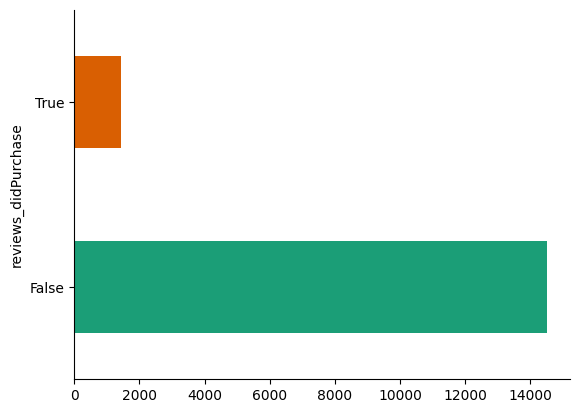

In [63]:
# @title reviews_didPurchase

from matplotlib import pyplot as plt
import seaborn as sns
review.groupby('reviews_didPurchase').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

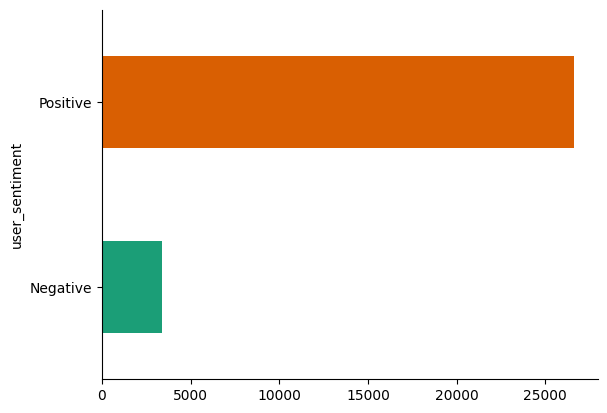

In [64]:
# @title user_sentiment

from matplotlib import pyplot as plt
import seaborn as sns
review.groupby('user_sentiment').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

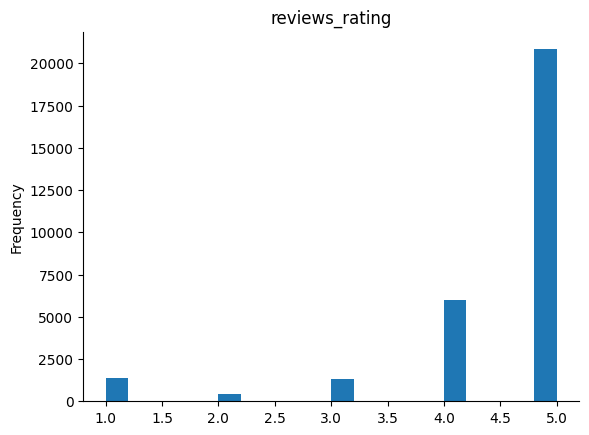

In [65]:
# @title reviews_rating

from matplotlib import pyplot as plt
review['reviews_rating'].plot(kind='hist', bins=20, title='reviews_rating')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [66]:
encoding


'ISO-8859-1'

In [67]:
desc

Attribute                              Attribute Description
0                     id  Uniques identity number to identify each uniqu...
1                  brand  Name of the brand of the product to which user...
2             categories  Category of the product like household essenti...
3           manufacturer            Name of the manufacturer of the product
4                   name  Name of the product to which user has added re...
5           reviews_date  Date on which the review has been added by the...
6    reviews_didPurchase  Whether a particular user has purchased the pr...
7    reviews_doRecommend  Whether a particular user has recommended the ...
8         reviews_rating   Rating given by the user to a particular product
9           reviews_text   Review given by the user to a particular product
10         reviews_title  The title of the review given by the user to a...
11      reviews_userCity                      The residing city of the user
12  reviews_userProvince                  The residing province of the user
13      reviews_username  The unique identification for individual user ...
14        user_sentiment  The overall sentiment of the user for a partic...

In [68]:
review.name.unique()

array(['Pink Friday: Roman Reloaded Re-Up (w/dvd)',
       'Lundberg Organic Cinnamon Toast Rice Cakes',
       'K-Y Love Sensuality Pleasure Gel',
       'J.R. Watkins Hand Cream, Lemon Cream',
       'Ambi Complexion Cleansing Bar',
       "Johnson's Baby Bubble Bath and Wash, 15oz",
       'Olay Regenerist Deep Hydration Regenerating Cream',
       'Windex Original Glass Cleaner Refill 67.6oz (2 Liter)',
       'Heinz Tomato Ketchup, 38oz',
       'Kind Dark Chocolate Chunk Gluten Free Granola Bars - 5 Count',
       'Pantene Color Preserve Volume Shampoo, 25.4oz',
       'Aussie Aussome Volume Shampoo, 13.5 Oz',
       "Cars Toon: Mater's Tall Tales", 'CeraVe SA Renewing Cream',
       'Solo Foods Almond Paste',
       'Finish Quantum Dishwasher Detergent, Lemon Sparkle Scent, 45 Count',
       'Disney174 Jake And The Neverland Pirates 4 Piece Bedding Set - Toddler',
       'Pearhead Id Bracelet Frame',
       'Craft Punch Giga Scallop Circle 45 24687534 To 334',
       'Neutrogena

In [89]:
review = mapper(review,"name")
review = mapper(review,"reviews_username")

name : 
No of unique values : 271
reviews_username : 
No of unique values : 24915


In [70]:
name_dict = uniq_dict(review,"name")

No of unique values : 271


In [71]:
user_dict = uniq_dict(review,"reviews_username")

No of unique values : 24915


In [72]:
name_dict['100:Complete First Season (blu-Ray)']

83

In [75]:
review2 = review

In [77]:
review2['namemap'] = review['name'].apply(lambda x: name_dict[x])

In [78]:
review2[['name','namemap']]

name  namemap
0              Pink Friday: Roman Reloaded Re-Up (w/dvd)        0
1             Lundberg Organic Cinnamon Toast Rice Cakes        1
2             Lundberg Organic Cinnamon Toast Rice Cakes        1
3                       K-Y Love Sensuality Pleasure Gel        2
4                       K-Y Love Sensuality Pleasure Gel        2
...                                                  ...      ...
29995  L'or233al Paris Elvive Extraordinary Clay Reba...      270
29996  L'or233al Paris Elvive Extraordinary Clay Reba...      270
29997  L'or233al Paris Elvive Extraordinary Clay Reba...      270
29998  L'or233al Paris Elvive Extraordinary Clay Reba...      270
29999  L'or233al Paris Elvive Extraordinary Clay Reba...      270

[30000 rows x 2 columns]

In [80]:
name_dict['Lundberg Organic Cinnamon Toast Rice Cakes']

1

In [81]:
for key, value in name_dict.items():
    # The if statement checks if the value of each item is equal to 56.
    if value == 270:
        # If the value is equal to 56, the key of that item is printed.
        print(key)

L'or233al Paris Elvive Extraordinary Clay Rebalancing Conditioner - 12.6 Fl Oz
